<a href="https://colab.research.google.com/github/ranggaanugrah/pemrograman-python/blob/main/TA_EfficientNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [3]:
import numpy as np
import os
import time
import keras 
import pickle
import cv2
import tensorflow as tf
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential, Model, load_model 
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D, Input
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from keras.preprocessing.image import ImageDataGenerator
from imutils import paths
from PIL import Image
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
keras.utils.np_utils.to_categorical
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
from torchvision import transforms


In [4]:
# grab all image paths in the input dataset directory, then initialize
# our list of images and corresponding class labels
print("[INFO] loading images...")
imagePaths = paths.list_images("Normaldata")
data = []
labels = []

[INFO] loading images...


In [5]:
# loop over our input images
for imagePath in imagePaths:
	# load the input image from disk, resize it to 64x64 pixels, scale
	# the pixel intensities to the range [0, 1], and then update our
	# images list
	image = Image.open(imagePath)
  #preprocessing
	image = np.array(image.resize((224, 224))) / 255.0 #normalisasi
	data.append(image)

	# extract the class label from the file path and update the
	# labels list
	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

In [6]:
print(labels)

['Invected', 'Invected', 'Invected', 'Invected', 'Invected', 'Invected', 'Invected', 'Invected', 'Invected', 'Invected', 'Invected', 'Invected', 'Invected', 'Invected', 'Invected', 'Invected', 'Invected', 'Invected', 'Invected', 'Invected', 'Invected', 'Invected', 'Invected', 'Invected', 'Invected', 'Invected', 'Invected', 'Invected', 'Invected', 'Invected', 'Invected', 'Invected', 'Invected', 'Invected', 'Invected', 'Invected', 'Invected', 'Invected', 'Invected', 'Invected', 'Invected', 'Invected', 'Invected', 'Invected', 'Invected', 'Invected', 'Invected', 'Invected', 'Invected', 'Invected', 'Invected', 'Invected', 'Invected', 'Invected', 'Invected', 'Invected', 'Invected', 'Invected', 'Invected', 'Invected', 'Invected', 'Invected', 'Invected', 'Invected', 'Invected', 'Invected', 'Invected', 'Invected', 'Invected', 'Invected', 'Invected', 'Invected', 'Invected', 'Invected', 'Invected', 'Invected', 'Invected', 'Invected', 'Invected', 'Invected', 'Invected', 'Invected', 'Invected', 'In

In [7]:
# encode the labels, converting them from strings to integers
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [8]:
# perform a training and testing split, using 75% of the data for
# training and 25% for evaluation
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.25, shuffle=True)
print(trainX.shape)
print(testX.shape)

(1575, 224, 224, 3)
(526, 224, 224, 3)


In [9]:
!pip install -U --pre efficientnet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 5.3 MB/s 


In [10]:
from efficientnet.tfkeras import EfficientNetB0

In [11]:

model = EfficientNetB0(include_top=False, input_shape=(224,224,3), weights='noisy-student')

#freeze model
model.trainable = False

16711680/16696600 [==============================] - 0s 0us/step


In [12]:
inputs = keras.Input(shape=(224,224,3))

x = model(inputs, training=False)

x = keras.layers.GlobalAveragePooling2D()(x)

outputs = keras.layers.Dense(1, activation='sigmoid')(x)

model = keras.Model(inputs=inputs, outputs=outputs, name="EfficientNet")

In [13]:
model.compile(optimizer=Adam(learning_rate = 0.001),
              loss= 'binary_crossentropy',
              metrics = ['acc'])

In [14]:
model.summary()

Model: "EfficientNet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 efficientnet-b0 (Functional  (None, 7, 7, 1280)       4049564   
 )                                                               
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 1)                 1281      
                                                                 
Total params: 4,050,845
Trainable params: 1,281
Non-trainable params: 4,049,564
_________________________________________________________________


In [15]:
history1 = model.fit(trainX,trainY, validation_data=(testX, testY), epochs=50, batch_size=32) 

Epoch 1/50
50/50 [==============================] - 69s 1s/step - loss: 0.4949 - acc: 0.8495 - val_loss: 0.3598 - val_acc: 0.9049
Epoch 2/50
50/50 [==============================] - 63s 1s/step - loss: 0.3315 - acc: 0.9029 - val_loss: 0.2928 - val_acc: 0.9163
Epoch 3/50
50/50 [==============================] - 63s 1s/step - loss: 0.2829 - acc: 0.9156 - val_loss: 0.2608 - val_acc: 0.9240
Epoch 4/50
50/50 [==============================] - 79s 2s/step - loss: 0.2583 - acc: 0.9168 - val_loss: 0.2382 - val_acc: 0.9316
Epoch 5/50
50/50 [==============================] - 81s 2s/step - loss: 0.2394 - acc: 0.9238 - val_loss: 0.2258 - val_acc: 0.9259
Epoch 6/50
50/50 [==============================] - 72s 1s/step - loss: 0.2252 - acc: 0.9263 - val_loss: 0.2144 - val_acc: 0.9297
Epoch 7/50
50/50 [==============================] - 71s 1s/step - loss: 0.2165 - acc: 0.9263 - val_loss: 0.2068 - val_acc: 0.9373
Epoch 8/50
50/50 [==============================] - 72s 1s/step - loss: 0.2098 - acc: 0.92

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


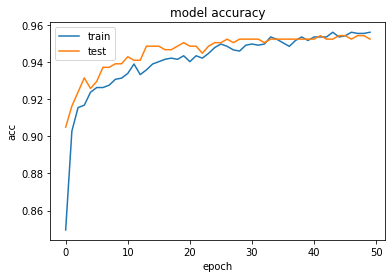

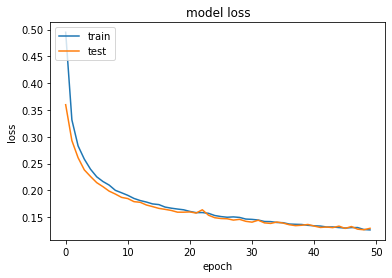

In [16]:
import matplotlib.pyplot as plt

print(history1.history.keys())
# summarize history for accuracy
plt.plot(history1.history['acc'])
plt.plot(history1.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [17]:
#fine-tunning
model.trainable = True

model.compile(optimizer=Adam(learning_rate = 0.00001),
              loss= 'binary_crossentropy',
              metrics = ['acc'])


In [18]:
history2 = model.fit(trainX,trainY, validation_data=(testX, testY), epochs=25, batch_size=32)

Epoch 1/25
50/50 [==============================] - 223s 4s/step - loss: 0.1317 - acc: 0.9530 - val_loss: 0.1113 - val_acc: 0.9563
Epoch 2/25
50/50 [==============================] - 209s 4s/step - loss: 0.1075 - acc: 0.9575 - val_loss: 0.1147 - val_acc: 0.9525
Epoch 3/25
50/50 [==============================] - 210s 4s/step - loss: 0.1014 - acc: 0.9619 - val_loss: 0.0986 - val_acc: 0.9658
Epoch 4/25
50/50 [==============================] - 210s 4s/step - loss: 0.0853 - acc: 0.9683 - val_loss: 0.0871 - val_acc: 0.9677
Epoch 5/25
50/50 [==============================] - 211s 4s/step - loss: 0.0751 - acc: 0.9752 - val_loss: 0.0880 - val_acc: 0.9696
Epoch 6/25
50/50 [==============================] - 216s 4s/step - loss: 0.0735 - acc: 0.9740 - val_loss: 0.0805 - val_acc: 0.9677
Epoch 7/25
50/50 [==============================] - 211s 4s/step - loss: 0.0798 - acc: 0.9689 - val_loss: 0.0850 - val_acc: 0.9734
Epoch 8/25
50/50 [==============================] - 210s 4s/step - loss: 0.0611 - a

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


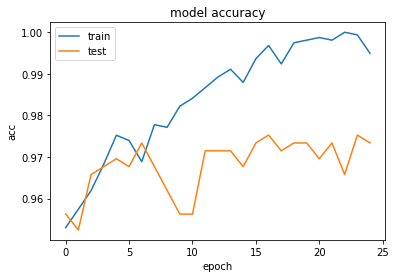

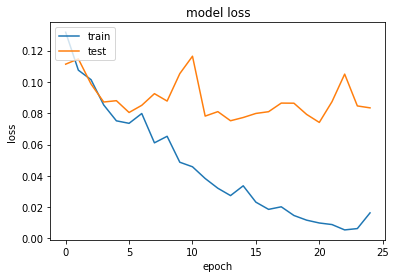

In [19]:
import matplotlib.pyplot as plt

print(history2.history.keys())
# summarize history for accuracy
plt.plot(history2.history['acc'])
plt.plot(history2.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [20]:
from sklearn.metrics import classification_report

predictions = model.predict(testX)
predictions = predictions.flatten()
print (predictions.round(2))



[1.   1.   0.   0.   0.99 0.   0.   1.   0.97 1.   1.   0.   0.01 1.
 1.   0.68 0.51 1.   0.   1.   0.53 0.   1.   0.   0.   1.   0.97 1.
 1.   0.   0.94 0.   0.   0.98 1.   1.   0.   0.   1.   1.   1.   1.
 1.   1.   0.99 1.   0.95 0.   0.   0.   0.93 0.   0.99 0.   0.19 0.72
 1.   1.   1.   1.   0.   1.   0.   0.   1.   1.   1.   1.   0.   0.99
 0.   1.   0.   0.   0.   0.   0.41 0.   0.   0.   1.   0.   0.   0.
 0.   1.   0.   0.   1.   0.   0.   0.   0.97 1.   0.   0.   0.99 0.
 0.   1.   1.   1.   0.   0.   1.   1.   1.   0.   0.01 0.21 0.   1.
 0.   0.   1.   0.   1.   0.99 0.   1.   1.   0.   1.   0.   0.97 0.
 0.99 0.   0.   0.   0.   0.   1.   1.   0.   0.   0.16 0.   0.   0.97
 0.   1.   0.   0.   0.   0.   1.   1.   0.   1.   0.68 0.   0.11 0.99
 0.   0.   0.   1.   1.   0.85 0.   1.   0.   0.   0.   0.   0.99 0.
 1.   1.   0.   1.   0.   1.   0.   0.   0.   0.99 0.   1.   0.   0.
 0.98 0.86 0.   0.   0.   0.   0.   0.6  0.95 0.   1.   0.98 0.94 1.
 0.   0.   1.   0.11 0.   

In [21]:
predY = np.where(predictions > 0.5, 1, 0)
print(predY)

[1 1 0 0 1 0 0 1 1 1 1 0 0 1 1 1 1 1 0 1 1 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 0
 0 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 0 0 1 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 1 0 0
 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 1 1 1 0 0 0 0
 1 0 0 1 0 1 1 0 1 1 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 1
 0 1 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 1 0 1 1 0 1 0 1 0 0 0 1 0 1 0 0 1 1 0
 0 0 0 0 1 1 0 1 1 1 1 0 0 1 0 0 1 1 0 1 0 1 1 1 0 1 1 0 0 0 1 1 1 1 0 0 1
 0 0 0 0 0 1 1 0 1 1 1 1 1 1 1 0 1 0 0 1 1 0 0 0 1 0 0 1 1 0 0 1 0 1 0 1 0
 1 0 0 1 0 0 0 0 1 1 1 1 0 0 0 1 1 0 0 0 0 1 0 1 0 1 0 1 0 0 1 0 0 0 1 1 0
 1 0 1 0 1 1 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 1 0 1 1 1 0 0 1 1 0 0 1
 1 1 1 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 1 0 0 1 1 1 0 0 0 1 1 0 0 1 1 1 0
 1 1 0 0 1 0 1 0 1 0 1 1 0 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0
 0 1 1 0 1 0 1 0 0 1 0 1 1 1 1 1 1 1 1 0 0 0 1 0 1 1 0 0 0 1 1 1 1 1 0 0 1
 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 0 1 0 1 0 0 1 0 1 0 1 0 0
 1 1 1 0 1 1 0 0 0 1 0 0 

In [22]:
print(classification_report(testY, predY, target_names=lb.classes_))

              precision    recall  f1-score   support

    Invected       0.97      0.98      0.97       264
 NonInvected       0.98      0.97      0.97       262

    accuracy                           0.97       526
   macro avg       0.97      0.97      0.97       526
weighted avg       0.97      0.97      0.97       526



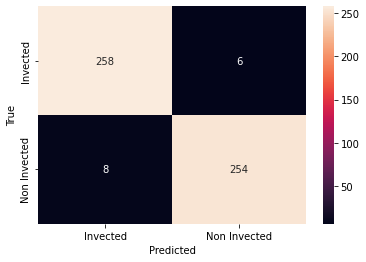

In [23]:
import sklearn.metrics as metrics
import seaborn as sn
import matplotlib.pyplot as plt

confusion_matrix = metrics.confusion_matrix(testY,predY)
x_axis_labels = ['Invected','Non Invected']
y_axis_labels = ['Invected','Non Invected']
sn.heatmap(confusion_matrix, xticklabels=x_axis_labels, yticklabels=y_axis_labels, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout
plt.show()


In [24]:
model.save ('EfficientNet_Model.h5')